In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it
import util
import pandas as pd
from world import World 

In [2]:
m_m_world = World(state_size =3, time =4, agent=["model_alt", "bayes"], memory=[10, 10], behav_control=[1, 1], seed=7)

m_m_world.create_agents()
m_m_world.run()
agents = m_m_world.get_agents()
errors = m_m_world.get_errors()
preds = m_m_world.get_pred()
priors = m_m_world.get_behav_priors()
costs = m_m_world.get_costs()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

alt pred [0.52327468 0.96086868 0.46083324]
bayes behavior [1 1 0]
alt dif [ 0.47672532  0.03913132 -0.46083324]
alt pred [0.52327468 0.96086868 0.46083324]
bayes behavior [1 1 0]
alt dif [ 0.47672532  0.03913132 -0.46083324]
alt pred [0.52327468 0.96086868 0.46083324]
bayes behavior [1 1 0]
alt dif [ 0.47672532  0.03913132 -0.46083324]
COST: [[0.32556329164634173], []]


bayes pred [0.5, 0.5, 0.5]
alt behavior [1 1 1]
bayes dif [0.5 0.5 0.5]
bayes avg error 0.5
bayes pred [0.5, 0.5, 0.5]
alt behavior [1 1 1]
bayes dif [0.5 0.5 0.5]
bayes avg error 0.5
COST: [[0.32556329164634173], [0.5]]


alt pred [0.5810064  0.96159123 0.40555512]
bayes behavior [1 1 1]
alt dif [0.4189936  0.03840877 0.59444488]
alt pred [0.5810064  0.96159123 0.40555512]
bayes behavior [1 1 1]
alt dif [0.4189936  0.03840877 0.59444488]
alt pred [0.5810064  0.96159123 0.40555512]
bayes behavior [1 1 1]
alt dif [0.4189936  0.03840877 0.59444488]
COST: [[0.32556329164634173, 0.3506157521800865], [0.5]]


bayes pred [0

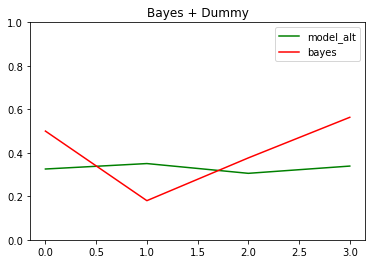

In [3]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Bayes + Dummy")
plt.show()

In [ ]:
alpha = [2,3,2]
beta  = [3,3,3]
world = [0,1,1]
possible_priors = np.linspace(0,1,100)
pp = possible_priors+0.01
print("a:", alpha)
print("b:", beta)
prior_dist = [sp.beta.cdf(x=possible_priors+.001, a=alpha[i], b=beta[i]) - sp.beta.cdf(x=possible_priors, a=alpha[i], b=beta[i]) for i in range(3)]
world_pred = [np.argmax(prior_dist[i])/100 for i in range(3)]
print("resulting prediction:", world_pred)
print("---")
print("world:", world)
alpha = [x + y for x, y in zip(alpha, world)]
print("new a:", alpha)
beta = [x - y + 1 for x, y in zip(beta, world)]
print("new b:", beta)
likelihood_dist = [sp.binom.pmf(k=alpha[i], n=len(world)+2, p=possible_priors) for i in range(3)]
posterior_dist = [prior_dist[i]*likelihood_dist[i] for i in range(len(prior_dist))]
norm_posterior_dist = [p/sum(p) for p in posterior_dist]
world_pred = [np.argmax(norm_posterior_dist[i])/100 for i in range(3)]
print("new pred:", world_pred)

[0.07630829 0.77991879 0.43840923 0.72346518 0.97798951 0.53849587
 0.50112046 0.07205113 0.26843898 0.4998825 ]
[0 0 1 0 1 1 0 1 1 1]
bayes pred [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
alt behavior [0 0 1 0 1 1 0 1 1 1]
bayes dif [-0.5 -0.5  0.5 -0.5  0.5  0.5 -0.5  0.5  0.5  0.5]
0.5
bayes pred [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
alt behavior [0 0 1 0 1 1 0 1 1 1]
bayes dif [-0.5 -0.5  0.5 -0.5  0.5  0.5 -0.5  0.5  0.5  0.5]
0.5
[[0.5], []]
[[0.5], [0.338]]
bayes pred [0.49, 0.49, 0.82, 0.49, 0.82, 0.82, 0.49, 0.82, 0.82, 0.82]
alt behavior [0. 0. 1. 0. 1. 1. 0. 1. 1. 1.]
bayes dif [-0.49 -0.49  0.18 -0.49  0.18  0.18 -0.49  0.18  0.18  0.18]
0.30400000000000005
bayes pred [0.49, 0.49, 0.82, 0.49, 0.82, 0.82, 0.49, 0.82, 0.82, 0.82]
alt behavior [0. 0. 1. 0. 1. 1. 0. 1. 1. 1.]
bayes dif [-0.49 -0.49  0.18 -0.49  0.18  0.18 -0.49  0.18  0.18  0.18]
0.30400000000000005
[[0.5, 0.30400000000000005], [0.338]]
[[0.5, 0.30400000000000005], [0.338, 0.445]]
bayes pre

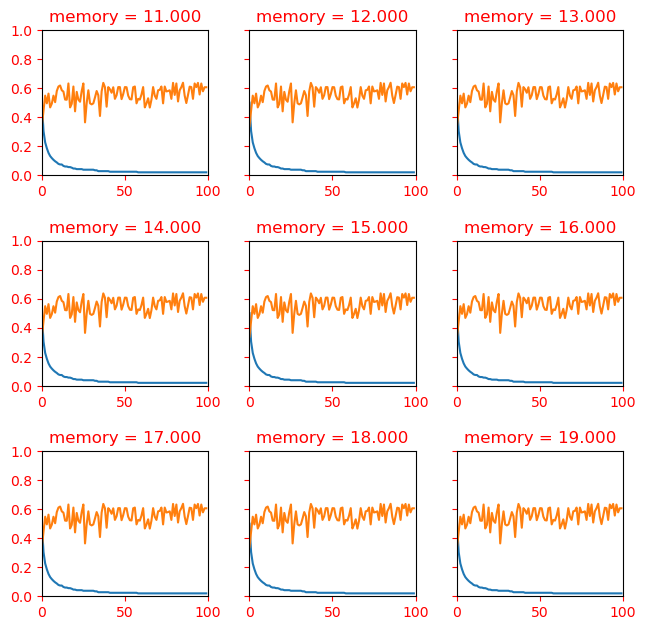

In [6]:
w = 2.5; h = 2.5
ncols = 3
nrows = 3
param_vals = [i for i in range(11, 20)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["bayes", "dummy"], memory=[param, param], behav_control=[1, 1], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('memory = %.3f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: time: 100, memory: 5, state size: 10, model_var: 0, behav_control varied")
plt.show()

In [7]:
a = np.array(np.arange(-3, 3, 0.5, dtype=int).reshape(2,2,3))
print(a, "\n\n")
print(a.T)

[[[-3 -2 -1]
  [ 0  1  2]]

 [[ 3  4  5]
  [ 6  7  8]]] 


[[[-3  3]
  [ 0  6]]

 [[-2  4]
  [ 1  7]]

 [[-1  5]
  [ 2  8]]]


In [8]:
np.empty((2,3))

array([[0. , 0.2, 0.4],
       [0.6, 0.8, 1. ]])